# Data Wargling (Join)
# => # => (inner, outer, left, right)
# => df.join()
# => df.merge()
# => pd.concat()

# Group by
# => df.groupby(by)
# => unstact
# => pivot_Table

# Handling Missing Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=20),
                   "Account No":np.random.randint(1,5, size=(20))})

df1.drop_duplicates(inplace=True)
df1
#12345-1234567-3
#1234512345673

,CNIC,Account No
0,7,4
1,18,3
2,19,2
3,2,2
4,7,2
5,11,4
6,10,2
8,7,3
9,15,2
10,13,1


In [3]:
df2 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=(20)),
                   "Account No":np.random.randint(1,5, size=(20)),
                   "Mobile No":np.random.randint(2001,3000, size=(20)),
                  "DOB":pd.date_range('1990-01-01', periods=20, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(20))],
                   "Gender":np.random.choice(["M","F"], size=(20))})
df2

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,3,1,2887,1990-01-31,A,F
1,15,4,2448,1990-02-28,Z,F
2,6,2,2981,1990-03-31,L,F
3,11,3,2909,1990-04-30,S,M
4,19,4,2216,1990-05-31,G,M
5,11,2,2946,1990-06-30,B,M
6,7,1,2488,1990-07-31,A,F
7,5,1,2871,1990-08-31,Q,F
8,18,2,2592,1990-09-30,G,F
9,10,1,2430,1990-10-31,W,M


In [4]:
df2.columns[np.in1d(df2.columns,df1.columns)]

Index(['CNIC', 'Account No'], dtype='object')

In [5]:
df2[df2.CNIC==4]

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender


In [6]:
print(df1.dtypes, df2.dtypes, sep="\n\n\n")

CNIC          int64
Account No    int64
dtype: object


CNIC                     int64
Account No               int64
Mobile No                int64
DOB             datetime64[ns]
CustomerName            object
Gender                  object
dtype: object


columnNameSameInBothDataframes
Name(optional), datatype, data_pattern

#data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")
#typeofJoin=inner,outer,left,right

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#if columns name differents in both table 

#data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

#data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')



data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")

In [7]:
a = df1.merge(df2, on="CNIC", how='inner')
print(len(df1))
print(len(df2))
print(len(a))
a

18
20
18


,CNIC,Account No_x,Account No_y,Mobile No,DOB,CustomerName,Gender
0,7,4,1,2488,1990-07-31,A,F
1,7,2,1,2488,1990-07-31,A,F
2,7,3,1,2488,1990-07-31,A,F
3,18,3,2,2592,1990-09-30,G,F
4,19,2,4,2216,1990-05-31,G,M
5,19,2,2,2216,1990-11-30,B,M
6,11,4,3,2909,1990-04-30,S,M
7,11,4,2,2946,1990-06-30,B,M
8,11,3,3,2909,1990-04-30,S,M
9,11,3,2,2946,1990-06-30,B,M


### data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

In [8]:
a = df1.merge(df2, on=["CNIC","Account No"], how="inner") #Join with multiples columns
print(len(df1))
print(len(df2))
print(len(a))
a

18
20
3


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,19,2,2216,1990-11-30,B,M
1,9,4,2585,1991-02-28,X,F
2,11,3,2909,1990-04-30,S,M


##### data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

In [9]:
df1.columns

Index(['CNIC', 'Account No'], dtype='object')

In [10]:
df1.columns = ['Customer CNIC', 'Customer Account No']
df1.head(2)

,Customer CNIC,Customer Account No
0,7,4
1,18,3


In [11]:
df2.head(2)

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,3,1,2887,1990-01-31,A,F
1,15,4,2448,1990-02-28,Z,F


In [12]:
a = df1.merge(df2, left_on="Customer CNIC", right_on="CNIC")
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,7,4,7,1,2488,1990-07-31,A,F
1,7,2,7,1,2488,1990-07-31,A,F
2,7,3,7,1,2488,1990-07-31,A,F
3,18,3,18,2,2592,1990-09-30,G,F
4,19,2,19,4,2216,1990-05-31,G,M
5,19,2,19,2,2216,1990-11-30,B,M
6,11,4,11,3,2909,1990-04-30,S,M
7,11,4,11,2,2946,1990-06-30,B,M
8,11,3,11,3,2909,1990-04-30,S,M
9,11,3,11,2,2946,1990-06-30,B,M


In [13]:
a = df1.merge(df2, 
              left_on=["Customer CNIC","Customer Account No"], 
              right_on=["CNIC","Account No"])
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,19,2,19,2,2216,1990-11-30,B,M
1,9,4,9,4,2585,1991-02-28,X,F
2,11,3,11,3,2909,1990-04-30,S,M


In [14]:
a[["CNIC","CustomerName","Mobile No"]]

,CNIC,CustomerName,Mobile No
0,19,B,2216
1,9,X,2585
2,11,S,2909


##### data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')


In [15]:
customers = pd.DataFrame({"Customers NIC": [14,6,19,22],"Customer Name":["A","B","C","D"]})


transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20))})


customers

,Customers NIC,Customer Name
0,14,A
1,6,B
2,19,C
3,22,D


In [17]:
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount
0,19,1,1990-01-31,TopUP,280793
1,21,1,1990-02-28,IBFT,864734
2,14,1,1990-03-31,FT,676979
3,6,1,1990-04-30,TopUP,735355
4,6,1,1990-05-31,IBFT,809560
5,6,1,1990-06-30,FT,35893
6,19,1,1990-07-31,IBFT,844277
7,14,1,1990-08-31,FT,195668
8,21,1,1990-09-30,TopUP,664989
9,21,1,1990-10-31,TopUP,351258


In [18]:
def fee_charges(x):
  if x>=1 and x<=100000:
    return 10
  elif x>100000 and x<=1000000:
    return 50
  else:
    return 100

transactions['fee'] = transactions.Amount.apply(fee_charges)
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,19,1,1990-01-31,TopUP,280793,50
1,21,1,1990-02-28,IBFT,864734,50
2,14,1,1990-03-31,FT,676979,50
3,6,1,1990-04-30,TopUP,735355,50
4,6,1,1990-05-31,IBFT,809560,50
5,6,1,1990-06-30,FT,35893,10
6,19,1,1990-07-31,IBFT,844277,50
7,14,1,1990-08-31,FT,195668,50
8,21,1,1990-09-30,TopUP,664989,50
9,21,1,1990-10-31,TopUP,351258,50


In [19]:
c = transactions.CNIC.value_counts()
print(c.index)
print(c.values)
print()
print(c)

Int64Index([14, 6, 21, 19], dtype='int64')
[6 6 5 3]

14    6
6     6
21    5
19    3
Name: CNIC, dtype: int64


In [20]:
a = customers.merge(c, left_on="Customers NIC", 
                    right_index=True, 
                    how='left')

a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,6.0
1,6,B,6.0
2,19,C,3.0
3,22,D,NaN


In [21]:
a = customers.merge(c, 
                    left_on="Customers NIC", 
                    right_index=True, 
                    how='right')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,6
1.0,6,B,6
2.0,19,C,3
NaN,21,NaN,5


In [22]:
a = customers.merge(c, 
                    left_on="Customers NIC", 
                    right_index=True, 
                    how='inner')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,6
1,6,B,6
2,19,C,3


In [23]:
a = customers.merge(c, 
                    left_on="Customers NIC", 
                    right_index=True, 
                    how='outer')

a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,6.0
1.0,6,B,6.0
2.0,19,C,3.0
3.0,22,D,NaN
NaN,21,NaN,5.0


# Slabs
* pd.cut(series)
* pd.qcut(series)

In [24]:
transactions.head(2)

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,19,1,1990-01-31,TopUP,280793,50
1,21,1,1990-02-28,IBFT,864734,50


In [27]:
slabs = [1,10000,50000,100000,500000,99000000]

pd.cut(transactions.Amount,slabs).value_counts()

(500000, 99000000]    11
(100000, 500000]       8
(10000, 50000]         1
(50000, 100000]        0
(1, 10000]             0
Name: Amount, dtype: int64

In [28]:
slabs = [0, 0.6, 0.8, .95, 1] # percentage/probability
pd.qcut(transactions.Amount,slabs).value_counts()

(35892.999, 658591.8]    12
(658591.8, 812430.0]      4
(812430.0, 871362.65]     3
(871362.65, 997307.0]     1
Name: Amount, dtype: int64

# Group by

In [26]:
#dataframeName.groupby("Col").agg([count])             optional(min,max,avg,sum, std)(int,float)
#dataframeName.groupby(by="Col")[["colname"]].agg([count]) 
#dataframeName.groupby(by=[col1,col2,..]).agg([count]) 

In [29]:
transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(20))})



transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1990-01-31,IBFT,645247,Karachi
1,19,1,1990-02-28,TopUP,139942,Lahore
2,21,1,1990-03-31,TopUP,177700,Islamabad
3,19,1,1990-04-30,IBFT,560965,Karachi
4,19,1,1990-05-31,IBFT,886198,Karachi
5,14,1,1990-06-30,FT,547365,Lahore
6,19,1,1990-07-31,IBFT,603046,Lahore
7,14,1,1990-08-31,IBFT,136384,Lahore
8,21,1,1990-09-30,FT,679291,Lahore
9,21,1,1990-10-31,TopUP,346027,Karachi


In [30]:
a = transactions.groupby("City").agg(['count'])
a

,CNIC,TransactionID,Transaction Date,Description,Amount
,count,count,count,count,count
City,,,,,
Islamabad,6,6,6,6,6
Karachi,6,6,6,6,6
Lahore,8,8,8,8,8


In [31]:
a = transactions.groupby("City").agg(['count'])
a[["CNIC"]]

,CNIC
,count
City,
Islamabad,6
Karachi,6
Lahore,8


In [32]:
a = transactions.groupby("City")[["CNIC"]].agg(['count'])
a

,CNIC
,count
City,
Islamabad,6
Karachi,6
Lahore,8


In [33]:
a = transactions.groupby("City")[["City"]].agg(['count'])
a

,City
,count
City,
Islamabad,6
Karachi,6
Lahore,8


In [34]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std])
a

count     min     max           mean            std
City      Description                                                     
Islamabad FT               3  199442  678597  495150.000000  258552.272465
          TopUP            3  177700  767338  415615.666667  310857.219305
Karachi   FT               1  619092  619092  619092.000000            NaN
          IBFT             4  210009  886198  575604.750000  279995.705103
          TopUP            1  346027  346027  346027.000000            NaN
Lahore    FT               2  547365  679291  613328.000000   93285.769215
          IBFT             4  136384  603046  366071.500000  236768.528525
          TopUP            2  139942  920147  530044.500000  551688.246216

In [38]:
a = transactions.groupby(["City","Description"])\
.Amount.agg(['count',min,max, np.mean, np.std,'sum']).reset_index()



a = a.sort_values(by=["City",'count'], ascending=[True,False])
a.to_excel("output.xlsx", index=False)
a

,City,Description,count,min,max,mean,std,sum
0,Islamabad,FT,3,199442,678597,495150.000000,258552.272465,1485450
1,Islamabad,TopUP,3,177700,767338,415615.666667,310857.219305,1246847
3,Karachi,IBFT,4,210009,886198,575604.750000,279995.705103,2302419
2,Karachi,FT,1,619092,619092,619092.000000,NaN,619092
4,Karachi,TopUP,1,346027,346027,346027.000000,NaN,346027
6,Lahore,IBFT,4,136384,603046,366071.500000,236768.528525,1464286
5,Lahore,FT,2,547365,679291,613328.000000,93285.769215,1226656
7,Lahore,TopUP,2,139942,920147,530044.500000,551688.246216,1060089


In [43]:
transactions.head()

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1990-01-31,IBFT,645247,Karachi
1,19,1,1990-02-28,TopUP,139942,Lahore
2,21,1,1990-03-31,TopUP,177700,Islamabad
3,19,1,1990-04-30,IBFT,560965,Karachi
4,19,1,1990-05-31,IBFT,886198,Karachi


In [50]:
transactions.groupby(["CNIC","Description"]).Amount.agg(['count']).unstack()

count           
Description    FT IBFT TopUP
CNIC                        
6             1.0  1.0   NaN
14            2.0  2.0   NaN
19            1.0  4.0   3.0
21            2.0  1.0   3.0

In [51]:
transactions.pivot_table(index="CNIC", columns=["Description"],
                        aggfunc='count')[["Amount"]]

Amount           
Description     FT IBFT TopUP
CNIC                         
6              1.0  1.0   NaN
14             2.0  2.0   NaN
19             1.0  4.0   3.0
21             2.0  1.0   3.0

In [52]:
a = transactions.groupby(["City","Description"]).\
Amount.agg(['count',min,max, np.mean, np.std]).unstack()

a

count                  min                           max  \
Description    FT IBFT TopUP        FT      IBFT     TopUP        FT   
City                                                                   
Islamabad     3.0  NaN   3.0  199442.0       NaN  177700.0  678597.0   
Karachi       1.0  4.0   1.0  619092.0  210009.0  346027.0  619092.0   
Lahore        2.0  4.0   2.0  547365.0  136384.0  139942.0  679291.0   

                                     mean                            \
Description      IBFT     TopUP        FT       IBFT          TopUP   
City                                                                  
Islamabad         NaN  767338.0  495150.0        NaN  415615.666667   
Karachi      886198.0  346027.0  619092.0  575604.75  346027.000000   
Lahore       603046.0  920147.0  613328.0  366071.50  530044.500000   

                       std                                
Description             FT           IBFT          TopUP  
City                                                      
Islamabad    258552.272465            NaN  310857.219305  
Karachi                NaN  279995.705103            NaN  
Lahore        93285.769215  236768.528525  551688.246216

Categorical data/nominal data
'orange','mango'


ordinal data
1,3,2,4 (discreate/countinues)
A,B,C
a,b,c
i,ii,iii

In [53]:
a = input("Enter no")
a.split(",")



Enter noaas


['aas']

In [54]:
list(str('232'))

['2', '3', '2']

In [57]:
transactions.groupby([transactions['Transaction Date'].dt.year, "City","CNIC"]).Amount.agg(['count','sum'])

count      sum
Transaction Date City      CNIC                
1990             Islamabad 21        2   479509
                 Karachi   19        3  2092410
                           21        1   346027
                 Lahore    14        2   683749
                           19        3  1663135
                           21        1   679291
1991             Islamabad 6         1   199442
                           14        1   678597
                           19        1   767338
                           21        1   607411
                 Karachi   19        1   619092
                           21        1   210009
                 Lahore    6         1   190326
                           14        1   534530

In [58]:
transactions.head()

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1990-01-31,IBFT,645247,Karachi
1,19,1,1990-02-28,TopUP,139942,Lahore
2,21,1,1990-03-31,TopUP,177700,Islamabad
3,19,1,1990-04-30,IBFT,560965,Karachi
4,19,1,1990-05-31,IBFT,886198,Karachi


count           
Description    FT IBFT TopUP
City                        
Islamabad     3.0  NaN   3.0
Karachi       1.0  4.0   1.0
Lahore        2.0  4.0   2.0

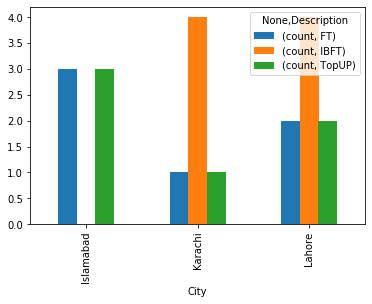

In [60]:
a = transactions.groupby(["City","Description"]).\
TransactionID.agg(['count']).unstack()

a.plot(kind='bar')
a

In [61]:
b = transactions.pivot_table(index="City", 
                             columns="Description", 
                             aggfunc=["count",'sum'])
b

count                                                         \
            Amount            CNIC            Transaction Date              
Description     FT IBFT TopUP   FT IBFT TopUP               FT IBFT TopUP   
City                                                                        
Islamabad      3.0  NaN   3.0  3.0  NaN   3.0              3.0  NaN   3.0   
Karachi        1.0  4.0   1.0  1.0  4.0   1.0              1.0  4.0   1.0   
Lahore         2.0  4.0   2.0  2.0  4.0   2.0              2.0  4.0   2.0   

                           ...              sum                              \
            TransactionID  ...           Amount                        CNIC   
Description            FT  ... TopUP         FT       IBFT      TopUP    FT   
City                       ...                                                
Islamabad             3.0  ...   3.0  1485450.0        NaN  1246847.0  41.0   
Karachi               1.0  ...   1.0   619092.0  2302419.0   346027.0  19.0   
Lahore                2.0  ...   2.0  1226656.0  1464286.0  1060089.0  35.0   

                                                  
                        TransactionID             
Description  IBFT TopUP            FT IBFT TopUP  
City                                              
Islamabad     NaN  61.0           3.0  NaN   3.0  
Karachi      78.0  21.0           1.0  4.0   1.0  
Lahore       53.0  38.0           2.0  4.0   2.0  

[3 rows x 21 columns]